**Dataset Fetching**

Note: Initialize the session first then upload the kaggle.json first to the session storage.

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! kaggle datasets download noulam/tomato

 98% 731M/743M [00:03<00:00, 199MB/s]
100% 743M/743M [00:03<00:00, 196MB/s]


In [ ]:
!unzip tomato.zip

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/ac022a2b-764c-4507-8dd9-4470b75763e4___RS_HL 9937.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/ac249839-fe21-45cd-9e09-f0023fa7ee3a___GH_HL Leaf 273.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/acdbf632-8d26-472d-874f-6d7df5cd0432___RS_HL 9897.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/acdf2283-0e7c-4ccd-8817-1019e3a8ed20___RS_HL 9943.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/acf28842-7821-4f31-ab73-2787e332e852___RS_HL 0011.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___h

In [ ]:
!rm tomato.zip

In [ ]:
%cd New Plant Diseases Dataset(Augmented)/

/content/New Plant Diseases Dataset(Augmented)


In [ ]:
%pwd

'/content/New Plant Diseases Dataset(Augmented)'

**Packages**

In [ ]:
import pandas as pd
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, Conv2D, MaxPooling2D, AveragePooling2D, Activation, Flatten, Dropout, Dense
)
from tensorflow.keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from os import listdir

**Data Pre-prosessing**

In [ ]:
training_dataset = "train"
validation_dataset = "valid"

train_data, test_data = [], []
directory_root = %pwd

CATEGORIES = ["Tomato___Bacterial_spot",
              "Tomato___Early_blight",
              "Tomato___Late_blight",
              "Tomato___Leaf_Mold",
              "Tomato___Septoria_leaf_spot",
              "Tomato___Spider_mites Two-spotted_spider_mite",
              "Tomato___Target_Spot",
              "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
              "Tomato___Tomato_mosaic_virus",
              "Tomato___healthy"]

try:
    print("[Console] Loading images for training dataset...")
    for category in CATEGORIES:
      print(f"[Console] Processing {category} ...")
      label = CATEGORIES.index(category)
      path = f"{training_dataset}/{category}"
      print(path)
      for image_file in listdir(path):
        image_directory = (f"{training_dataset}/{category}/{image_file}")
        print(image_directory)
        if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
          image = cv.imread(image_directory,1)
          image = cv.cvtColor(image,cv.COLOR_BGR2RGB)
          image = cv.resize(image,(64,64))            
          train_data.append([image,label])

    print("[Console] Loading images for testing dataset...")
    for category in CATEGORIES:
      print(f"[Console] Processing {category} ...")
      label = CATEGORIES.index(category)
      path = f"{validation_dataset}/{category}"
      print(path)
      for image_file in listdir(path):
        image_directory = (f"{validation_dataset}/{category}/{image_file}")
        print(image_directory)
        if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
          image = cv.imread(image_directory,1)
          image = cv.cvtColor(image,cv.COLOR_BGR2RGB)
          image = cv.resize(image,(64,64))            
          test_data.append([image,label])

    print("[Console] Image loading completed.")  
except Exception as e:
    print(f"Error : {e}")

print(len(train_data))
print(len(test_data))

Streaming output truncated to the last 5000 lines.
train/Tomato___healthy/01c1da17-8d9f-4d69-8a1e-58d37453d3c3___RS_HL 9641_new30degFlipLR.JPG
train/Tomato___healthy/4e3e2f5a-04a7-4142-aad1-acfa13344e33___GH_HL Leaf 358.JPG
train/Tomato___healthy/1c092a12-ed60-42c8-86b4-0427db78a5d3___RS_HL 0076_new30degFlipLR.JPG
train/Tomato___healthy/0cb10f98-491d-4e1f-b8ea-4fb0f1b3675f___GH_HL Leaf 333_flipTB.JPG
train/Tomato___healthy/452703f7-9106-4ed2-8f38-8ece42a32613___RS_HL 0248.JPG
train/Tomato___healthy/3e51f746-2ed2-4eb4-96e7-f6717ec068fd___RS_HL 0122_180deg.JPG
train/Tomato___healthy/7acc2f36-b465-4131-9110-265965ccdb87___RS_HL 0150.JPG
train/Tomato___healthy/0a334ae6-bea3-4453-b200-85e082794d56___GH_HL Leaf 310.1_newPixel25.JPG
train/Tomato___healthy/3f730857-e87b-4de0-bcbb-fdf0314e2250___GH_HL Leaf 245.1_new30degFlipLR.JPG
train/Tomato___healthy/3b0d89df-61d0-407f-9a26-661c8bb730cf___GH_HL Leaf 242.JPG
train/Tomato___healthy/cdfeddb6-3064-48dc-bac9-05441dedc74e___RS_HL 0323.JPG
train/To

**Dataset Shuffling and Splitting**

In [ ]:
import random

random.shuffle(train_data)
random.shuffle(test_data)

for lbl in train_data[:10]:
    print(lbl[1])
    
X_train=[]
y_train=[]

for features,label in train_data:
    X_train.append(features)
    y_train.append(label)

Y=[]
for i in y_train:
    if i==0:
        Y.append("Bacterial Spot")
    elif i==1:
        Y.append("Early Blight")
    elif i==2:
        Y.append("Late Blight")
    elif i==3:
        Y.append("Leaf Mold")
    elif i==4:
        Y.append("Septoria Leaf Spot")
    elif i==5:
        Y.append("Two-spotted Spider Mite")
    elif i==6:
        Y.append("Target Spot")
    elif i==7:
        Y.append("Yellow Leaf Curl Virus")
    elif i==8:
        Y.append("Mosaic Virus")
    else:
        Y.append("Healthy")

len(X_train),len(y_train)

X_test=[]
y_test=[]

for features,label in test_data:
    X_test.append(features)
    y_test.append(label)
    
Z=[]
for i in y_test:
    if i==0:
        Z.append("Bacterial Spot")
    elif i==1:
        Z.append("Early Blight")
    elif i==2:
        Z.append("Late Blight")
    elif i==3:
        Z.append("Leaf Mold")
    elif i==4:
        Z.append("Septoria Leaf Spot")
    elif i==5:
        Z.append("Two-spotted Spider Mite")
    elif i==6:
        Z.append("Target Spot")
    elif i==7:
        Z.append("Yellow Leaf Curl Virus")
    elif i==8:
        Z.append("Mosaic Virus")
    else:
        Z.append("Healthy")

len(X_test),len(y_test)

1
0
8
8
5
5
9
8
4
0


(4585, 4585)

**Reshaping**

In [ ]:
X_train=np.array(X_train).reshape(-1,64,64,3)
X_train=X_train/255.0
X_train.shape

(18345, 64, 64, 3)

In [ ]:
X_test=np.array(X_test).reshape(-1,64,64,3)
X_test=X_test/255.0
X_test.shape

(4585, 64, 64, 3)

**Categories**

In [ ]:
order = ["Bacterial Spot",
         "Early Blight",
         "Late Blight",
         "Leaf Mold",
         "Septoria Leaf Spot",
         "Two-spotted Spider Mite",
         "Target Spot",
         "Yellow Leaf Curl Virus",
         "Mosaic Virus",
         "Healthy"]

**Training Dataset**

Text(0.5, 0, 'Image Count')

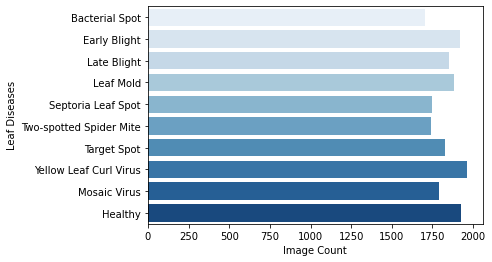

In [ ]:
ax=sns.countplot(y = Y,
                 order = order,
                 palette = "Blues")
ax.set_ylabel("Leaf Diseases")
ax.set_xlabel("Image Count")

**Testing Dataset**

Text(0.5, 0, 'Image Count')

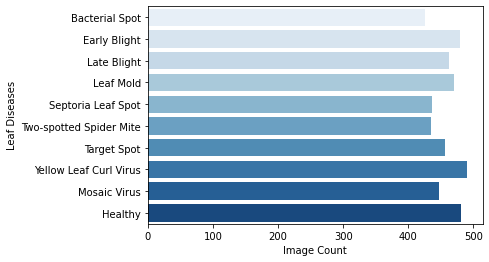

In [ ]:
ax=sns.countplot(y = Z,
                 order = order,
                 palette = "Blues")
ax.set_ylabel("Leaf Diseases")
ax.set_xlabel("Image Count")

**One-hot Encoding**

In [ ]:
one_hot_train=to_categorical(y_train)
one_hot_train

one_hot_test=to_categorical(y_test)
one_hot_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

**Modelling**

In [ ]:
classifier=Sequential()

classifier.add(Conv2D(32,(3,3), input_shape=(64,64,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.2))

classifier.add(Conv2D(64,(3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.2))

classifier.add(Conv2D(128,(3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.4))

classifier.add(Flatten())

classifier.add(Dense(activation='relu', units=64))
classifier.add(Dense(activation='relu', units=128))
classifier.add(Dense(activation='relu', units=64))
classifier.add(Dense(activation='softmax', units=10))

In [ ]:
classifier.compile(loss='categorical_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

**Model Summary**

In [ ]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 14, 14, 64)       

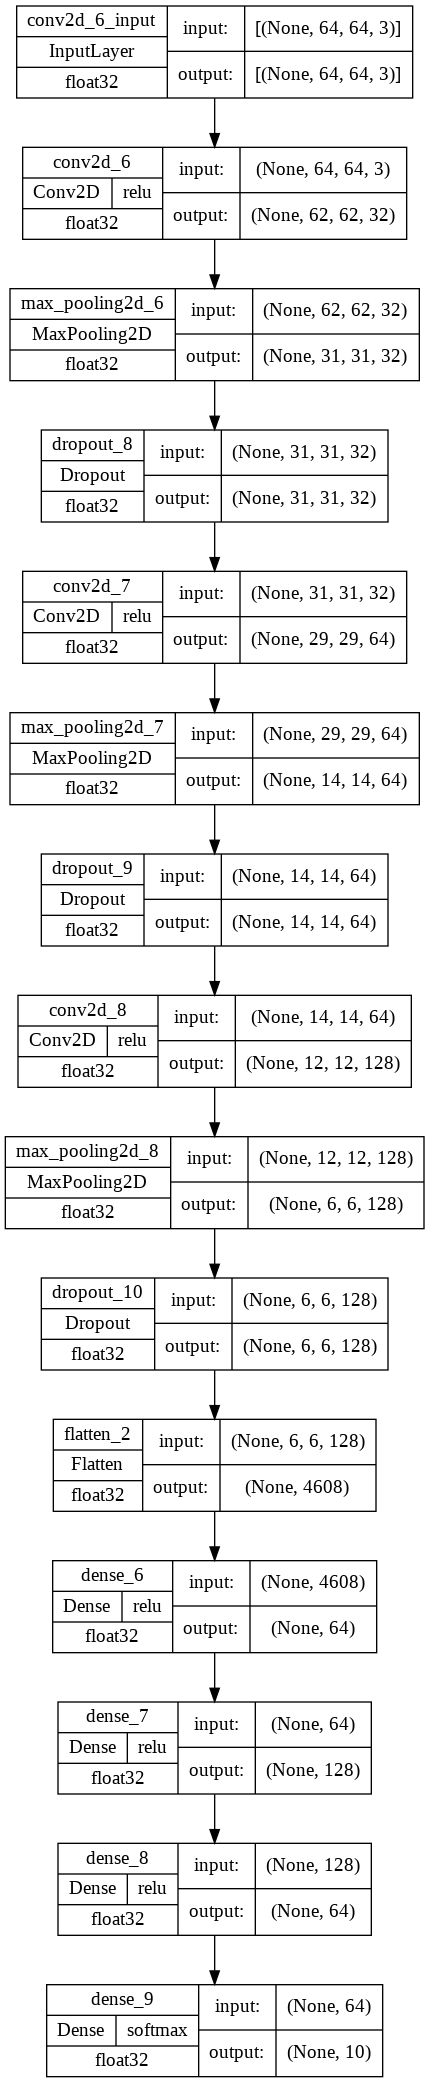

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(
    classifier,
    to_file='proposed.png',
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True
)

**Model Training**

In [ ]:
history = classifier.fit(X_train,
                      one_hot_train,
                      epochs=30,
                      batch_size = 32,
                      verbose = 1,
                      validation_split = 0.2
                      )

Epoch 1/30
459/459 [==============================] - 125s 271ms/step - loss: 1.5245 - accuracy: 0.4462 - val_loss: 1.0037 - val_accuracy: 0.6293
Epoch 2/30
459/459 [==============================] - 124s 269ms/step - loss: 0.7546 - accuracy: 0.7330 - val_loss: 0.7764 - val_accuracy: 0.7250
Epoch 3/30
459/459 [==============================] - 123s 269ms/step - loss: 0.5627 - accuracy: 0.8026 - val_loss: 0.5137 - val_accuracy: 0.8158
Epoch 4/30
459/459 [==============================] - 122s 267ms/step - loss: 0.4512 - accuracy: 0.8370 - val_loss: 0.3778 - val_accuracy: 0.8681
Epoch 5/30
459/459 [==============================] - 122s 266ms/step - loss: 0.3907 - accuracy: 0.8627 - val_loss: 0.3265 - val_accuracy: 0.8874
Epoch 6/30
459/459 [==============================] - 122s 266ms/step - loss: 0.3110 - accuracy: 0.8901 - val_loss: 0.3356 - val_accuracy: 0.8806
Epoch 7/30
459/459 [==============================] - 122s 266ms/step - loss: 0.2794 - accuracy: 0.9011 - val_loss: 0.2782 -

**Model Evaluation**

In [ ]:
scores = classifier.evaluate(X_test,one_hot_test)

print('Test Loss:',scores[0] * 100,'%') 
print('Test Accuracy:',scores[1] * 100,'%')

144/144 [==============================] - 9s 64ms/step - loss: 0.1667 - accuracy: 0.9492
Test Loss: 16.66913479566574 %
Test Accuracy: 94.91820931434631 %


**Loss Plot**

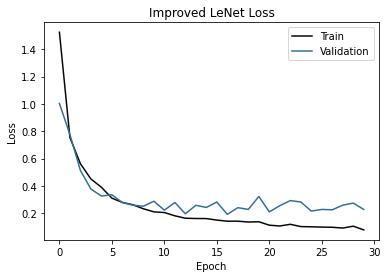

In [ ]:
plt.plot(history.history['loss'], '#03080c')
plt.plot(history.history['val_loss'], '#336ea0')
plt.title('Improved LeNet Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper right')
plt.show()

**Accuracy Plot**

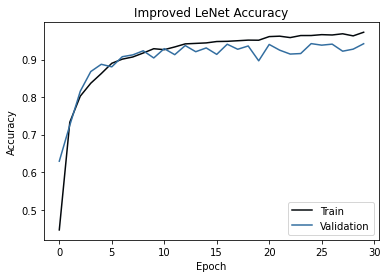

In [ ]:
plt.plot(history.history['accuracy'], '#03080c')
plt.plot(history.history['val_accuracy'], '#336ea0')
plt.title('Improved LeNet Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='lower right')
plt.show()

**Confusion Matrix**

In [ ]:
y_prediction = classifier.predict(X_test)

y_pred_classes = np.argmax(y_prediction,axis = 1) 

y_true = np.argmax(one_hot_test,axis = 1) 

144/144 [==============================] - 10s 65ms/step


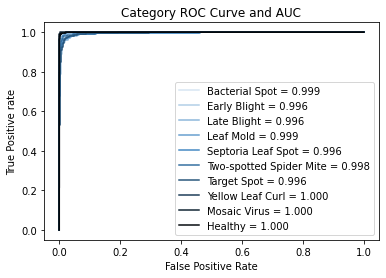

In [ ]:
fpr = {}
tpr = {}
thresh ={}
roc_auc={}

n_class = 10

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prediction[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
      
plt.plot(fpr[0], tpr[0], color='#d6e5f2',label='Bacterial Spot = %0.3f' % roc_auc[0])
plt.plot(fpr[1], tpr[1], color='#b1cee6',label='Early Blight = %0.3f' % roc_auc[1])
plt.plot(fpr[2], tpr[2], color='#8cb6da',label='Late Blight = %0.3f' % roc_auc[2])
plt.plot(fpr[3], tpr[3], color='#679fce',label='Leaf Mold = %0.3f' % roc_auc[3])
plt.plot(fpr[4], tpr[4], color='#4288c2',label='Septoria Leaf Spot = %0.3f' % roc_auc[4])
plt.plot(fpr[5], tpr[5], color='#336ea0',label='Two-spotted Spider Mite = %0.3f' % roc_auc[5])
plt.plot(fpr[6], tpr[6], color='#27557b',label='Target Spot = %0.3f' % roc_auc[6])
plt.plot(fpr[7], tpr[7], color='#1b3b56',label='Yellow Leaf Curl = %0.3f' % roc_auc[7])
plt.plot(fpr[8], tpr[8], color='#0f2231',label='Mosaic Virus = %0.3f' % roc_auc[8])
plt.plot(fpr[9], tpr[9], color='#03080c',label='Healthy = %0.3f' % roc_auc[9])
plt.title('Category ROC Curve and AUC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.legend(loc='best')

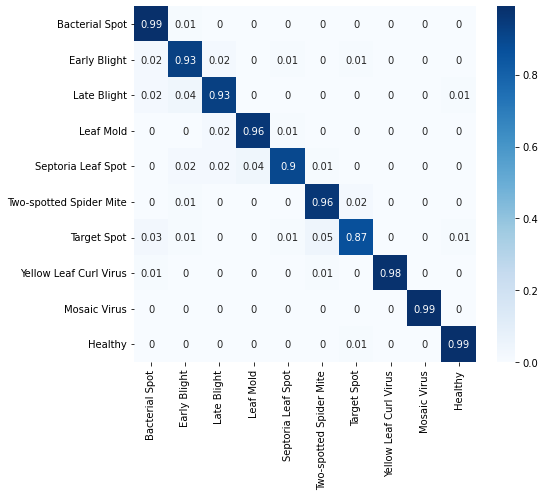

In [ ]:
confusion_mtx = confusion_matrix(y_test, y_pred_classes)
con_mat_norm = np.around(confusion_mtx.astype('float') / confusion_mtx.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = order, 
                     columns = order)
plt.figure(figsize=(8,7))
sns.heatmap(con_mat_df, annot=True, cmap='Blues')
plt.tight_layout()
plt.show()

# Saving Trained Model

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#Save Model
model_save_name = 'proposed.pt'
path = F"/content/gdrive/My Drive/AI/Models/CNN/{model_save_name}" 
classifier.save(path)

# Prediction with Trained Model

Step 1: Upload the zip files (TestPredict nd Lenet-5) to the session storage.

Step 2: Run the cell below to unzip them all.

Step 3: Load the model by running the next cell.

Step 4: Compile the loaded pre-trained model.

Step 5: U

In [ ]:
# Unzip Saved Model
%cd /content/
!unzip proposed.pt.zip

In [ ]:
# Unzip Test Images
%cd /content/
!unzip TestPredict.zip

/content
Archive:  TestPredict.zip
   creating: TestPredict/
   creating: TestPredict/Bacterial Spot/
  inflating: TestPredict/Bacterial Spot/B3.jpg  
  inflating: TestPredict/Bacterial Spot/B4.jpg  
  inflating: TestPredict/Bacterial Spot/BS1.jpg  
  inflating: TestPredict/Bacterial Spot/BS2.jpg  
  inflating: TestPredict/Bacterial Spot/BS5.jpg  
   creating: TestPredict/Early Blight/
  inflating: TestPredict/Early Blight/EB1.jpg  
  inflating: TestPredict/Early Blight/EB2.jpg  
  inflating: TestPredict/Early Blight/EB3.jpg  
  inflating: TestPredict/Early Blight/EB4.jpg  
  inflating: TestPredict/Early Blight/EB5.jpg  
   creating: TestPredict/Healthy/
  inflating: TestPredict/Healthy/H1.jpg  
  inflating: TestPredict/Healthy/H2.jpg  
  inflating: TestPredict/Healthy/H3.jpg  
  inflating: TestPredict/Healthy/H4.jpg  
  inflating: TestPredict/Healthy/H5.jpg  
   creating: TestPredict/Late Blight/
  inflating: TestPredict/Late Blight/LB1.jpg  
  inflating: TestPredict/Late Blight/LB2.j

In [ ]:
#Load Model
from keras.models import load_model
classifier = load_model('/content/proposed.pt')

In [ ]:
#Predict
# load the model we saved
classifier.compile(loss='categorical_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])


1/1 [==============================] - 0s 28ms/step
Mosaic Virus


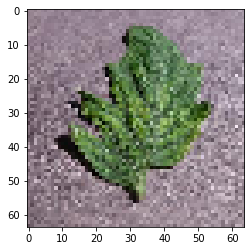

In [ ]:
#Model Prediction

from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import matplotlib.pyplot as plt
import numpy as np

order = ["Bacterial Spot",
         "Early Blight",
         "Late Blight",
         "Leaf Mold",
         "Septoria Leaf Spot",
         "Two-spotted Spider Mite",
         "Target Spot",
         "Yellow Leaf Curl Virus",
         "Mosaic Virus",
         "Healthy"]

chosen_image = 'TestPredict/Mosaic Virus/MV5.jpg'

img = load_img(chosen_image, target_size=(64, 64))

plt.imshow(img)
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
preds = classifier.predict(x)
preds = order[np.argmax(preds)]
print(preds)